# Postwork 3

En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. En el postwork pasado exploramos las variables numéricas y ya deberías de tener una idea general bastante buena de cómo están organizadas. Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

- Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.

- Identifica todas las variables categóricas en tu dataset.

- Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.

- Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

- Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.

- Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'dark')

In [7]:
data = pd.read_csv("Marvel Movies.csv")
data.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


Las variables categóricas de este conjunto de datos son:

- **ID** que establece el estado de la identidad del personaje. 

In [8]:
data['ID'].unique()

array(['Secret Identity', 'Public Identity', 'No Dual Identity',
       'Known to Authorities Identity', nan], dtype=object)

In [19]:
id_counts = data['ID'].value_counts()

id_counts

Secret Identity                  6275
Public Identity                  4528
No Dual Identity                 1788
Known to Authorities Identity      15
Name: ID, dtype: int64

Text(0, 0.5, 'Número de personajes')

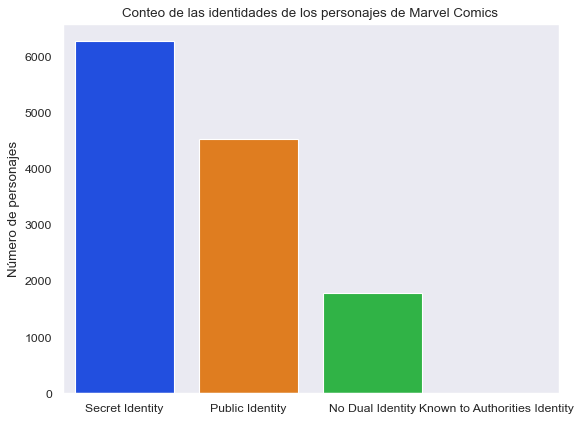

In [43]:
fig = plt.figure(figsize=(8,6), dpi = 80)

ax = sns.barplot(x = id_counts.index, y = id_counts, palette= 'bright')
ax.set_title('Conteo de las identidades de los personajes de Marvel Comics')
ax.set_ylabel('Número de personajes')

In [9]:
data['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan],
      dtype=object)

In [34]:
aling_counts = data['ALIGN'].value_counts()

aling_counts

Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64

Text(0, 0.5, 'Número de personajes')

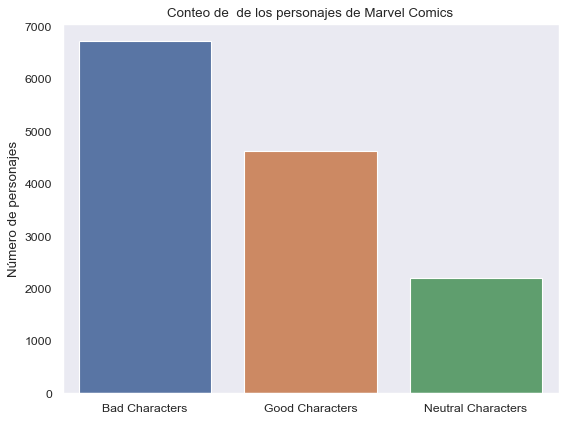

In [36]:
fig = plt.figure(figsize=(8,6), dpi = 80)

ax = sns.barplot(x = aling_counts.index, y = aling_counts)
ax.set_title('Conteo de  de los personajes de Marvel Comics')
ax.set_ylabel('Número de personajes')

In [11]:
data['EYE'].unique()

array(['Hazel Eyes', 'Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Grey Eyes',
       'Yellow Eyes', 'Gold Eyes', 'Red Eyes', 'Black Eyeballs',
       'Amber Eyes', 'Variable Eyes', nan, 'Black Eyes', 'White Eyes',
       'Orange Eyes', 'Silver Eyes', 'Purple Eyes', 'Pink Eyes',
       'One Eye', 'Violet Eyes', 'Multiple Eyes', 'Magenta Eyes',
       'Yellow Eyeballs', 'No Eyes', 'Compound Eyes'], dtype=object)

Text(0, 0.5, 'Número de personajes')

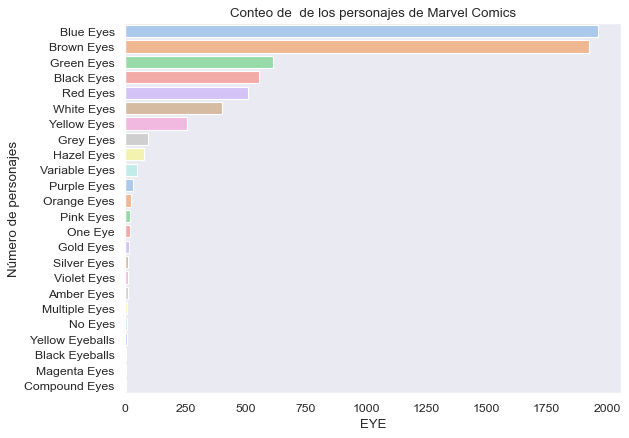

In [46]:
eye_colors = data['EYE'].value_counts()

fig = plt.figure(figsize=(8,6), dpi = 80)

ax = sns.barplot(y = eye_colors.index, x = eye_colors, palette='pastel')
ax.set_title('Conteo de  de los personajes de Marvel Comics')
ax.set_ylabel('Número de personajes')

In [12]:
data['HAIR'].unique()

array(['Brown Hair', 'White Hair', 'Black Hair', 'Blond Hair', 'No Hair',
       'Blue Hair', 'Red Hair', 'Bald', 'Auburn Hair', 'Grey Hair',
       'Silver Hair', 'Purple Hair', 'Strawberry Blond Hair',
       'Green Hair', 'Reddish Blond Hair', 'Gold Hair', nan,
       'Orange Hair', 'Pink Hair', 'Variable Hair', 'Yellow Hair',
       'Light Brown Hair', 'Magenta Hair', 'Bronze Hair', 'Dyed Hair',
       'Orange-brown Hair'], dtype=object)

In [13]:
data['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

In [15]:
data['GSM'].unique()

array([nan, 'Bisexual Characters', 'Transvestites',
       'Homosexual Characters', 'Pansexual Characters',
       'Transgender Characters', 'Genderfluid Characters'], dtype=object)

In [16]:
data['ALIVE'].unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)